In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("/Users/cartermain/Downloads/diabetes.csv")

Let's check for any null values to drop

In [4]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Let's inspect how all features correlate with the Outcome

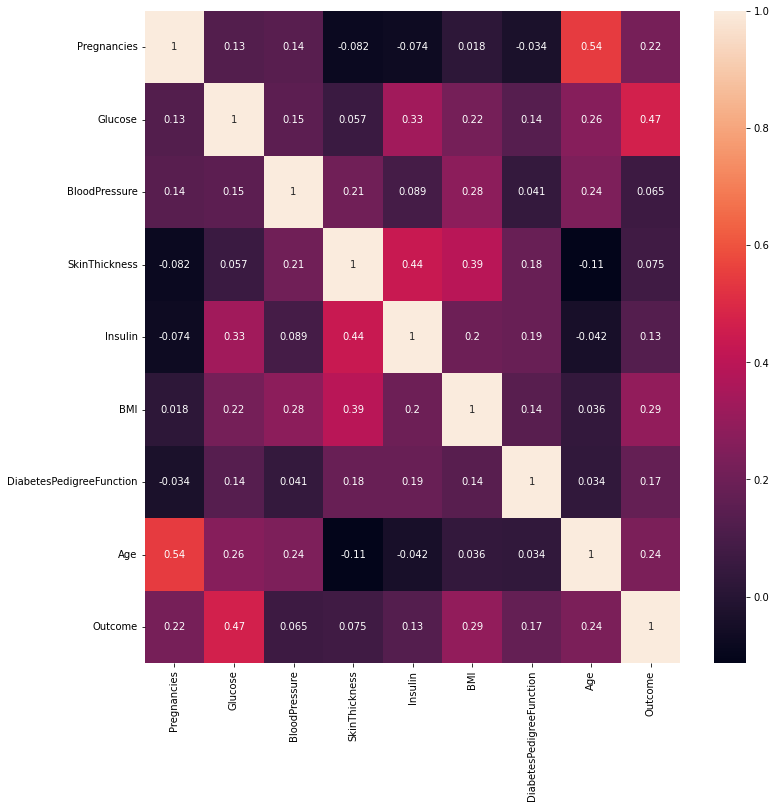

<Figure size 432x288 with 0 Axes>

In [6]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot = True)
plt.show()
plt.clf()

In [12]:
print(df.corr()["Outcome"].sort_values(ascending = False))

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


It looks as though Glucose has the highest correlation with diabetic outcome by a fairly large margin. Now, let's take at the average glucose levels of people who have vs do not have diabetes

In [16]:
print(round(df["Glucose"].groupby(df["Outcome"]).mean(),2))

Outcome
0    109.98
1    141.26
Name: Glucose, dtype: float64


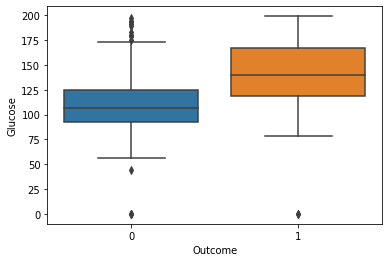

<Figure size 432x288 with 0 Axes>

In [17]:
sns.boxplot(x = df["Outcome"], y = df["Glucose"], data = df)
plt.show()
plt.clf()

Let's take a look at the relationship between BMI and Blood Pressure

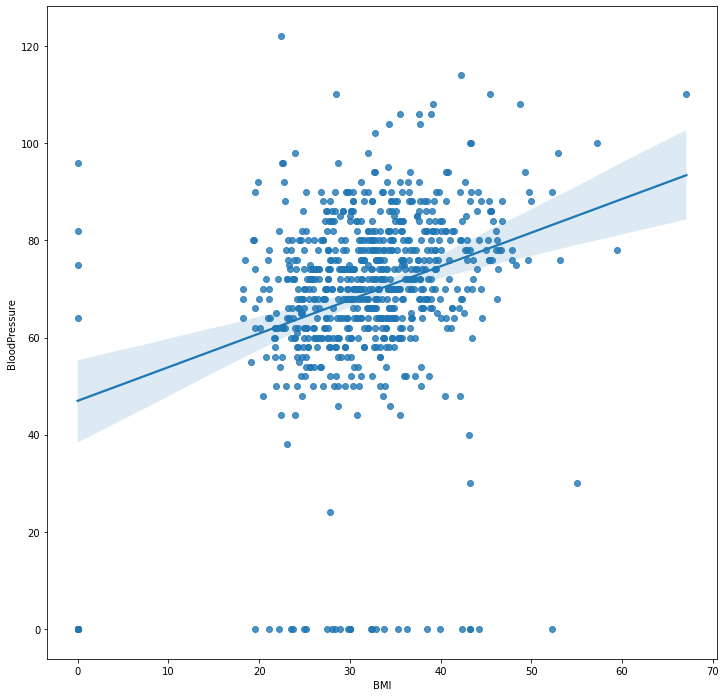

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize = (12,12))
sns.regplot(x = df["BMI"], y = df["BloodPressure"], data = df)
plt.show()
plt.clf()

In [25]:
print(round(df.corr()["BloodPressure"]["BMI"],2))

0.28


There is definitely a positive correlation. Let's look at the average blood pressure by BMI.

In [29]:
df["BMI_rounded"] = round(df["BMI"],0)

In [33]:
print(round(df["BloodPressure"].groupby(df["BMI_rounded"][(df["BMI_rounded"] <= 35) & (df["BMI_rounded"] >= 18)]).mean().sort_values(ascending = False),2))

BMI_rounded
19.0    71.67
32.0    71.23
23.0    71.12
34.0    70.61
31.0    70.26
35.0    70.21
33.0    70.05
27.0    69.92
18.0    69.50
26.0    67.46
29.0    67.32
28.0    66.91
30.0    65.96
20.0    63.20
25.0    62.38
22.0    62.37
24.0    62.32
21.0    60.89
Name: BloodPressure, dtype: float64


Lastly, let's inspect the relationship between age and pregnancies

In [36]:
print(round(df.corr()["Pregnancies"]["Age"],2))

0.54


Unsurprisingly, there is a relatively strong correlation between the two

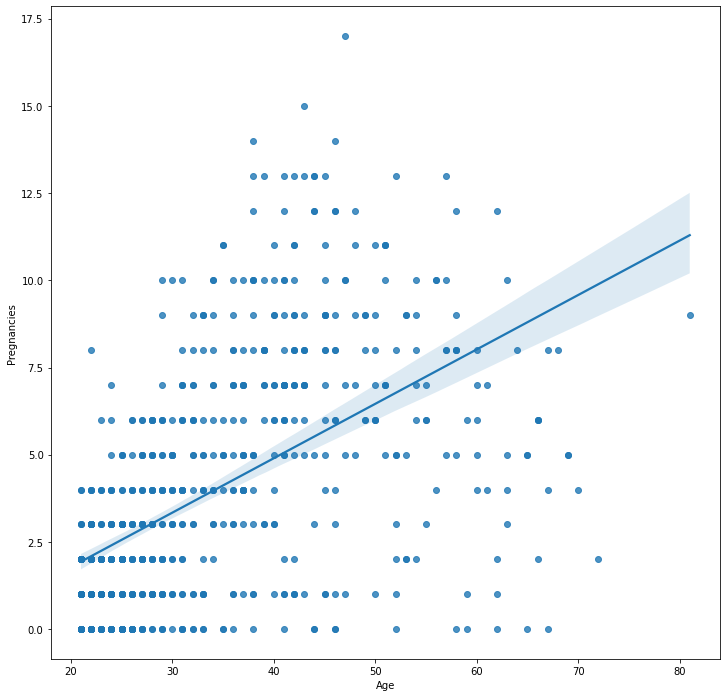

<Figure size 432x288 with 0 Axes>

In [44]:
plt.figure(figsize = (12,12))
sns.regplot(x = df["Age"], y = df["Pregnancies"], data = df)
plt.show()
plt.clf()

Let's check the average number of pregnancies by age groups of 10

In [48]:
print(df["Age"].min(), df["Age"].max())
x = 0
for age in df["Age"]:
    if age < 30:
        df.at[x, "Age_group"] = "20s"
    elif age < 40 and age > 29:
        df.at[x, "Age_group"] = "30s"
    elif age < 50 and age > 39:
        df.at[x, "Age_group"] = "40s"
    elif age < 60 and age > 49:
        df.at[x, "Age_group"] = "50s"
    elif age < 70 and age > 59:
        df.at[x, "Age_group"] = "60s"
    else:
        df.at[x, "Age_group"] = "70+"
    x += 1

21 81


In [53]:
print(round(df["Pregnancies"].groupby(df["Age_group"]).mean(),2))

Age_group
20s    1.92
30s    4.99
40s    7.05
50s    6.60
60s    5.03
70+    5.00
Name: Pregnancies, dtype: float64


Finally, let's check the % makeup of pregnancies

In [65]:
print(round((df["Pregnancies"].value_counts() / len(df["Pregnancies"])*100),2))

1     17.58
0     14.45
2     13.41
3      9.77
4      8.85
5      7.42
6      6.51
7      5.86
8      4.95
9      3.65
10     3.12
11     1.43
13     1.30
12     1.17
14     0.26
15     0.13
17     0.13
Name: Pregnancies, dtype: float64


last thing to check is averages of all features for people who do and do not have diabetes

In [83]:
print("Averages for women with diabetes")
print("")
print(round(df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]][df["Outcome"] == 1].mean(),2))

Averages for women with diabetes

Pregnancies                   4.87
Glucose                     141.26
BloodPressure                70.82
SkinThickness                22.16
Insulin                     100.34
BMI                          35.14
DiabetesPedigreeFunction      0.55
Age                          37.07
dtype: float64


In [82]:
print("Averages for women without diabetes")

print(round(df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]][df["Outcome"] == 0].mean(),2))

Averages for women without diabetes

Pregnancies                   3.30
Glucose                     109.98
BloodPressure                68.18
SkinThickness                19.66
Insulin                      68.79
BMI                          30.30
DiabetesPedigreeFunction      0.43
Age                          31.19
dtype: float64


Let's look at the percentage delta for each feature

In [84]:
features = df.drop(columns = ["Outcome", "BMI_rounded", "Age_group"])

In [90]:
print("Delta among feature averages between diabetic and non-diabetic women")
print("")
for feature in features.columns:
    diabetic = df[feature][df["Outcome"] == 1].mean()
    non_diabetic = df[feature][df["Outcome"] == 0].mean()
    delta = ((diabetic - non_diabetic) / non_diabetic) * 100
    print(feature + ": " + str(round(delta, 2)) + "%")

Delta among feature averages between diabetic and non-diabetic women

Pregnancies: 47.53%
Glucose: 28.44%
BloodPressure: 3.87%
SkinThickness: 12.71%
Insulin: 45.85%
BMI: 15.97%
DiabetesPedigreeFunction: 28.1%
Age: 18.84%
